# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

### It is recommended to upload the zipped EMNIST dataset to your Google Drive.

### Then, mount Google Drive and import the dataset (by executing the following code).

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Unzipping .zip dataset file from drive to /content folder of your colab notebook

import shutil
import zipfile

zip_file_path = '/content/drive/MyDrive/A_Z Handwritten Data.zip' # Change as per your dataset file path in drive
extracted_dir = '/content'

import os
os.makedirs(extracted_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [4]:
data = pd.read_csv('A_Z Handwritten Data.csv')

# Display this dataset
display(data)
# It's first column contains all the labels (o to 25 for A to Z) and the remaining 784 columns contain pixel values.
# Seperate them accordingly as X (for pixel values) and Y (for labels)
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values
# Convert these to numpy arrays
# Normalize the X array (X/255), normalizing by 255 scales pixel values to a range between 0 and 1, promoting numerical stability, consistent scale across features, and optimizing the sensitivity of activation functions during neural network training.
X = X/255.0
# As you can see, this dataset is sorted from A to Z, it needs to be shuffled before it can be used for training
# Shuffle the dataset
len = X.shape[0]
perm = np.random.permutation(len)
X = X[perm]
Y = Y[perm]
# Create training and validation sets

X_train = X[:335205]
Y_train = Y[:335205]
X_valid = X[335205:]
Y_valid = Y[335205:]


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train.shape

(335205, 784)

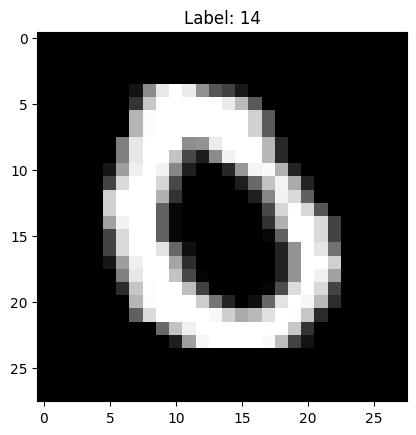

In [6]:
# Display a single training set sample along with its label using matplot heatmap
sample = X_train[0].reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.title(f"Label: {Y_train[0]}")
plt.show()

# Model

In [7]:
# You can copy-paste your MNIST model and make necessary changes to train the model on EMNIST
# Changes would include : Shapes of weight matrices, no. of output nodes and return vector of one_hot function
# Note that you might need to increase number of nodes in the hidden layers too to accomodate for the additional output information compared to MNIST
# Experiment with these numbers and find the optimal number of nodes for each layer

In [8]:
i = 784 # Input size (no. of pixels = 28*28 = 784)
h1 = 100# Choose a reasonable no. of nodes for 1st hidden layer
h2 = 80# Choose a reasonable no. of nodes for 2nd hidden layer
o = 26 # Output size (no. of digits to classify)
lr = 0.001# Choose a reasonable learning rate
epochs = 10# Choose a reasonable no. of epochs

# Initialize the weights and biases (Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero.)

# Initialize W1 W2 W3
W1 = np.random.randn(i,h1)
W2 = np.random.randn(h1,h2)
W3 = np.random.randn(h2,o)

# Initialize b1 b2 b3
b1 = np.zeros((1,h1))
b2 = np.zeros((1,h2))
b3 = np.zeros((1,o))


def sigmoid(z) :
  g = 1/(1+np.exp(-z))
  return g
    # Returns sigmoid of z
def sigmoidprime(z) :
    # Returns derivative of sigmoid function of z
    s = sigmoid(z)
    return s*(1-s)

def one_hot(y,bs) :
    one_hot_val = np.zeros((bs,26))
    one_hot_val[np.arange(bs),y] = 1
    return one_hot_val

cost_array = []
accuracy_array = []


# forward propagation function
def forward_prop(X, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X,W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1,W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W3) + b3
    y_pred = sigmoid(z3)
    return z1,a1,z2,a2,z3,y_pred

# backward propagation function
def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, z1, a1, z2, a2, z3, y_pred):
    y_one_hot = one_hot(Y, 1)
    del3 = y_pred - y_one_hot
    W2_transpose = W2.T
    W3_transpose = W3.T
    del2 = np.dot(del3, W3_transpose)*sigmoidprime(z2)
    del1 = np.dot(del2, W2_transpose)*sigmoidprime(z1)

    W1 = W1 - lr * np.dot(X.reshape(-1,1),del1)
    b1 = b1 - lr * del1
    W2 = W2 - lr * np.dot(a1.reshape(-1,1),del2)
    b2 = b2 - lr * del2
    W3 = W3 - lr * np.dot(a2.reshape(-1,1),del3)
    b3 = b3 - lr * del3
    return W1,b1,W2,b2,W3,b3

# for calculation of accuracy
def calculate_acc(X, Y, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = sigmoid(z3)

    correct_val = np.argmax(y_pred, axis=1) == Y
    correct = np.sum(correct_val)
    accuracy = correct/Y.shape[0]
    return accuracy

length = X_train.shape[0]
for ep in range(epochs):
    for i in range(length):

        # Carry out the forward propagation matrices calculations for z1, a1, z2, a2, z3 and y_predicted
        z1, a1, z2, a2, z3, y_pred = forward_prop(X_train[i], W1, b1, W2, b2, W3, b3)
        # Convert the label of current iteration (Y_train[i]) to one hot encoded vector
        y_one_hot = one_hot(Y_train[i],1)
        # Calulate the cost as per your choice of loss function
        cost = np.sum((y_pred-y_one_hot)**2)
        # You can append this loss function value to the cost values list at every 200 iterations or so
        if i%200 == 0:
            cost_array.append(cost)
        # Carry out the back propagation matrices calculations
        # Update the values of W1 W2 W3 b1 b2 b3 as per the backpropagation values
        W1, b1, W2, b2, W3, b3 = backward_prop(X_train[i], Y_train[i], W1, b1, W2, b2, W3, b3, z1, a1, z2, a2, z3, y_pred)

        # End of loop (i)

    # Carry out forward propagation for the validation set
    z1_valid, a1_valid, z2_valid, a2_valid, z3_valid, y_valid_pred = forward_prop(X_valid, W1, b1, W2, b2, W3, b3)

    # Find the accuracy by comparing the model output on validation set with validation set labels
    accuracy = calculate_acc(X_valid, Y_valid, W1, b1, W2, b2, W3, b3)

    # You can print this accuracy to see your model's performance at the end of each epoch
    print(f"Accuracy:{accuracy}")
    # Append the accuracy values to the accuracy list
    accuracy_array.append(accuracy)

Accuracy:0.6938112498321922
Accuracy:0.7738756880118136
Accuracy:0.8120284601959995
Accuracy:0.8368908578332662
Accuracy:0.8525708148744798
Accuracy:0.8624244865082561
Accuracy:0.8710162437911129
Accuracy:0.8782923882400322
Accuracy:0.884655658477648
Accuracy:0.8899181098133978


# Testing the model

In [9]:
def classify(image):
    # Carry out forward propagation on input 'image' and return the predicted values of the trained model
    z1 = np.dot(image,W1)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1,W2)+b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W3)+b3
    y_pred = sigmoid(z3)
    predicted_val = np.argmax(y_pred)
    return predicted_val

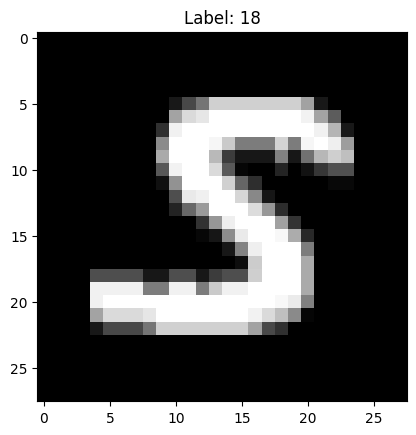

In [10]:
# Display an image from the dataset
image = X_valid[20].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f"Label: {Y_valid[20]}")
plt.show()
# Display the model's output for this image utilizing the classify function
predicted_values = classify(X_valid[20])

In [11]:
# Use np.save function to export the numpy arrays (Weights and bias matrices) after training and achieving a good accuracy
np.save("W1.npy",W1)
np.save("b1.npy",b1)
np.save("W2.npy",W2)
np.save("b2.npy",b2)
np.save("W3.npy",W3)
np.save("b3.npy",b3)